In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [189]:
na_values = ['UNKNOWN', 'unknown', 'Unknown', 'Unknown ve', '(0.0, 0.0)', 'Unspecified', 'OTHER', 'other']

df = pd.read_csv('crashes.csv', na_values=na_values)
df_sample = df.sample(frac=.02)

## Data exploration

In [190]:
df_sample.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1508502,07/28/2014,8:10,QUEENS,11413,40.669170,-73.751471,"(40.6691703, -73.7514714)",NaN,NaN,P/L 141-25 224 STREET,...,NaN,NaN,NaN,NaN,1000003,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1809089,01/27/2013,16:45,STATEN ISLAND,10314,40.615260,-74.160165,"(40.6152604, -74.1601646)",LAMBERTS LANE,SELDIN AVENUE,NaN,...,NaN,NaN,NaN,NaN,296344,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
408322,06/21/2019,14:03,QUEENS,11418.0,40.691795,-73.843760,"(40.691795, -73.84376)",91 AVENUE,102 STREET,NaN,...,NaN,NaN,NaN,NaN,4157347,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
896751,04/27/2017,10:30,BRONX,10463.0,40.873642,-73.907970,"(40.873642, -73.90797)",NaN,NaN,40 WEST 225 STREET,...,Driver Inattention/Distraction,NaN,NaN,NaN,3659138,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,NaN,NaN,NaN
314303,12/09/2019,8:41,BROOKLYN,11218.0,40.631800,-73.974915,"(40.6318, -73.974915)",NaN,NaN,4111 18 AVENUE,...,NaN,NaN,NaN,NaN,4255390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [191]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41576 entries, 1508502 to 1159838
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     41576 non-null  object 
 1   CRASH TIME                     41576 non-null  object 
 2   BOROUGH                        28526 non-null  object 
 3   ZIP CODE                       28521 non-null  object 
 4   LATITUDE                       36965 non-null  float64
 5   LONGITUDE                      36965 non-null  float64
 6   LOCATION                       36861 non-null  object 
 7   ON STREET NAME                 32714 non-null  object 
 8   CROSS STREET NAME              25754 non-null  object 
 9   OFF STREET NAME                7052 non-null   object 
 10  NUMBER OF PERSONS INJURED      41575 non-null  float64
 11  NUMBER OF PERSONS KILLED       41575 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  41576 non-nu

In [192]:
df_sample.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          13050
ZIP CODE                         13055
LATITUDE                          4611
LONGITUDE                         4611
LOCATION                          4715
ON STREET NAME                    8862
CROSS STREET NAME                15822
OFF STREET NAME                  34524
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1    14199
CONTRIBUTING FACTOR VEHICLE 2    36034
CONTRIBUTING FACTOR VEHICLE 3    41395
CONTRIBUTING FACTOR VEHICLE 4    41541
CONTRIBUTING FACTOR VEHICLE 5    41565
COLLISION_ID                         0
VEHICLE TYPE CODE 1               1145
VEHICLE TYPE CODE 2      

In [193]:
# defining the dataset ID
df_sample.set_index('COLLISION_ID', inplace=True)

Dropping columns that have more than 25% null values

### Handling missing values and irrelevant data

In [194]:
# dropping columns with more than 25% missing values
threshold = len(df_sample) * 0.25
df_sample.dropna(thresh=threshold, axis=1, inplace=True)

In [195]:
# dropping rows with missing values
df_sample.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          13050
ZIP CODE                         13055
LATITUDE                          4611
LONGITUDE                         4611
LOCATION                          4715
ON STREET NAME                    8862
CROSS STREET NAME                15822
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1    14199
VEHICLE TYPE CODE 1               1145
VEHICLE TYPE CODE 2               9854
dtype: int64

In [196]:
# showing dispersion measures
df_sample.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,36965.000000,36965.000000,41575.000000,41575.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000
mean,40.609000,-73.715842,0.309345,0.001636,0.054382,0.000842,0.026818,0.000096,0.223591,0.000698
std,2.158497,3.972157,0.696508,0.043836,0.236432,0.029002,0.164066,0.009808,0.658384,0.030620
min,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.667400,-73.975020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.720181,-73.927320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.768795,-73.866700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.912884,0.000000,12.000000,3.000000,5.000000,1.000000,3.000000,1.000000,12.000000,3.000000


Deleting logical irrelevant columns

In [197]:
# dropping irrelevant columns
# NUMBER OF PERSON INJURED/KILLED are summary columns
df_sample.drop([
    'VEHICLE TYPE CODE 2',
    'ZIP CODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    ], axis=1, inplace=True)

Simplifying feature names

In [198]:
# renaming columns
df_sample.rename(columns={
    'CRASH DATE': 'DATE',
    'CRASH TIME': 'TIME',
    'LATITUDE': 'LAT',
    'LONGITUDE': 'LON',
    'ON STREET NAME': 'ON_STREET',
    'CROSS STREET NAME': 'CROSS_STREET',
    'NUMBER OF PERSONS INJURED': 'INJURED',
    'NUMBER OF PERSONS KILLED': 'KILLED',
    'NUMBER OF PEDESTRIANS INJURED': 'PED_INJURED',
    'NUMBER OF PEDESTRIANS KILLED': 'PED_KILLED',
    'NUMBER OF CYCLIST INJURED': 'CY_INJURED',
    'NUMBER OF CYCLIST KILLED': 'CY_KILLED',
    'NUMBER OF MOTORIST INJURED': 'MOT_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOT_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR',
    'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR2',
    'VEHICLE TYPE CODE 1': 'VEHICLE'
    }, inplace=True)

#### Cleaning the target variable

Dropping all rows with null in the target varible

In [199]:
# Dropping rows with missing values in the 'VEHICLE' column
df_sample.dropna(subset=['VEHICLE'], inplace=True)

df_sample.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
CROSS_STREET    object
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [200]:
df_sample['ON_STREET'] = df_sample['ON_STREET'].str.upper()
df_sample['CROSS_STREET'] = df_sample['CROSS_STREET'].str.upper()
df_sample['BOROUGH'] = df_sample['BOROUGH'].str.upper()
df_sample['FACTOR'] = df_sample['FACTOR'].str.upper()

Dropping low occurencies of categories in the target variable VEHICLE

In [201]:
# converting VEHICLE column to uppercase
df_sample['VEHICLE'] = df_sample['VEHICLE'].str.upper()

In [202]:
# Dropping low occurrence values in the 'VEHICLE' column
df_filtered = df_sample.groupby('VEHICLE').filter(lambda x: len(x) >= 10)


In [203]:
# Showing the most frequent values in the 'VEHICLE' column
df_filtered['VEHICLE'].value_counts()

VEHICLE
SEDAN                                  11698
STATION WAGON/SPORT UTILITY VEHICLE     9091
PASSENGER VEHICLE                       8177
SPORT UTILITY / STATION WAGON           3629
TAXI                                    1644
PICK-UP TRUCK                            919
4 DR SEDAN                               808
VAN                                      720
BUS                                      701
BOX TRUCK                                483
LARGE COM VEH(6 OR MORE TIRES)           286
BIKE                                     278
SMALL COM VEH(4 TIRES)                   257
MOTORCYCLE                               251
TRACTOR TRUCK DIESEL                     233
LIVERY VEHICLE                           203
AMBULANCE                                146
E-BIKE                                    84
DUMP                                      69
CONVERTIBLE                               67
2 DR SEDAN                                65
E-SCOOTER                                 47
PK

Rename categories that refers to the same vehicle

In [204]:
df_filtered[df_filtered['VEHICLE'] == 'STATION WAGON/SPORT UTILITY VEHICLE']['VEHICLE'] = 'SPORT UTILITY / STATION WAGON'
df_filtered[df_filtered['VEHICLE'] == 'PK']['VEHICLE'] = 'PICK-UP TRUCK'
df_filtered[df_filtered['VEHICLE'] == 'BICYCLE']['VEHICLE'] = 'BIKE'
df_filtered[df_filtered['VEHICLE'] == 'E-BYKE']['VEHICLE'] = 'BIKE'

In [223]:
df_filtered['VEHICLE'].value_counts()

VEHICLE
28    11698
31     9091
24     8177
30     3629
33     1644
25      919
1       808
37      720
8       701
7       483
19      286
6       278
29      257
22      251
35      233
20      203
3       146
13       84
12       69
11       67
0        65
14       47
26       46
21       44
18       43
16       37
9        29
34       26
32       21
36       21
23       20
15       19
10       17
5        14
17       12
2        12
27       11
4        10
Name: count, dtype: int64

Finding and excluding outliers

In [205]:
# Showing 
df_filtered.describe()

,PED_INJURED,PED_KILLED,CY_INJURED,CY_KILLED,MOT_INJURED,MOT_KILLED
count,40238.000000,40238.00000,40238.000000,40238.000000,40238.000000,40238.000000
mean,0.049779,0.00087,0.026766,0.000099,0.226428,0.000671
std,0.227215,0.02948,0.163845,0.009970,0.660692,0.030317
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.00000,3.000000,1.000000,12.000000,3.000000


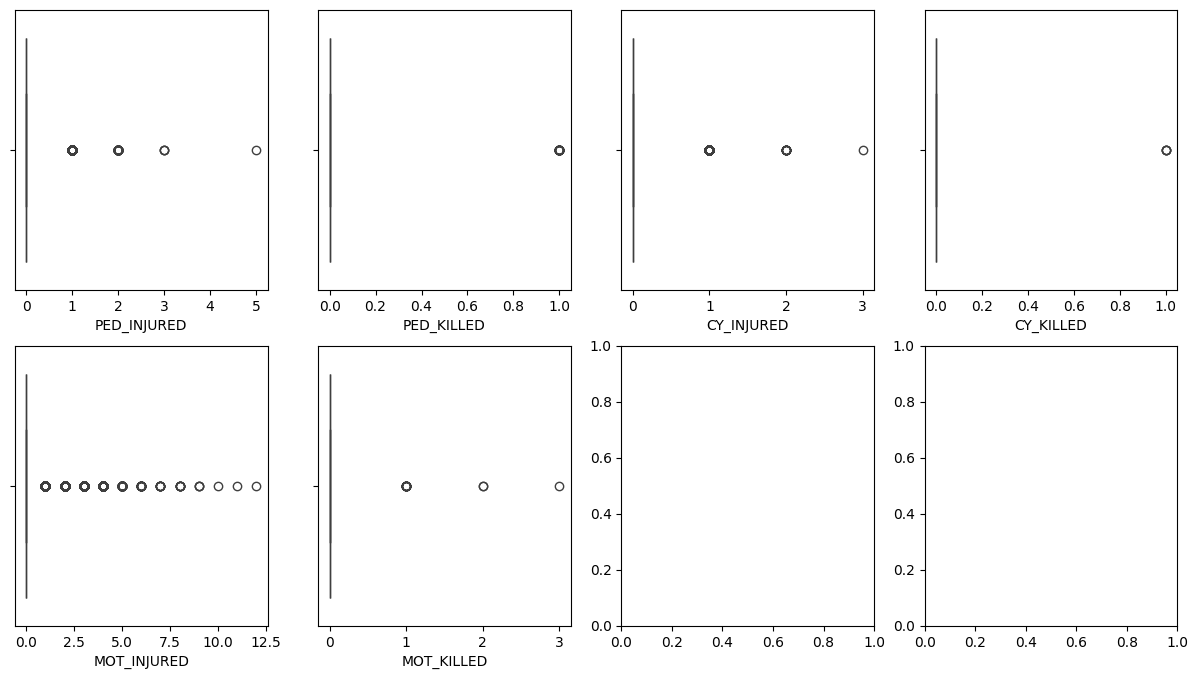

In [206]:
numerical_columns = df_filtered.select_dtypes(include='number').columns.tolist()

img, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_filtered[column], ax=axs[i//4, i%4])

plt.show()

#### Filling missing values with their mode and mean for categorical and numerical values respectively

In [207]:
# filling all categorical missing values with their mode
categorical_columns = df_filtered.select_dtypes(include='object').columns.tolist()

for column in categorical_columns:
    df_filtered[column] = df_filtered[column].str.strip()
    df_filtered.fillna({column: df_filtered[column].mode()[0]}, inplace=True)

# filling numberical missing values with its mean
numerical_columns = df_filtered.select_dtypes(include='number').columns.tolist()

for column in numerical_columns:
    df_filtered.fillna({column: df_filtered[column].mean()}, inplace=True)


In [208]:
df_filtered.isnull().sum()

DATE            0
TIME            0
BOROUGH         0
ON_STREET       0
CROSS_STREET    0
PED_INJURED     0
PED_KILLED      0
CY_INJURED      0
CY_KILLED       0
MOT_INJURED     0
MOT_KILLED      0
FACTOR          0
VEHICLE         0
dtype: int64

### Parsing categorical colums to numeric representation

Based on that most of the categorical columns have many categories One-Hot enconding is not suitable therefore Label Encoding would be a better solution

In [209]:
df_filtered.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
CROSS_STREET    object
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [210]:
from sklearn.preprocessing import LabelEncoder
# creating a label encoder
label_encoder = LabelEncoder()
# categorical columns that have to be encoded
categorical_columns = df_filtered[['BOROUGH', 'ON_STREET', 'CROSS_STREET', 'FACTOR', 'VEHICLE']].columns.tolist()
# encoding categorical columns
for column in categorical_columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])


Creating new column with month and time instead of date and time

In [211]:
# taking only month and time in hours from the 'DATE' and 'TIME' columns
df_filtered['MONTH'] = df_filtered['DATE'].apply(lambda x: int(x.split('/')[0]))
df_filtered['TIME'] = df_filtered['TIME'].apply(lambda x: float(x.replace(':', '.')))

df_filtered.drop('DATE', axis=1, inplace=True)


In [212]:
df_filtered[['MONTH', 'TIME']].head()

,MONTH,TIME
COLLISION_ID,,
1000003,7,8.10
296344,1,16.45
4157347,6,14.03
3659138,4,10.30
4255390,12,8.41


## Training and model selection

### Data spliting and target variable balancing using SMOTE

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_filtered.drop('VEHICLE', axis=1)
y = df_filtered['VEHICLE']

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

X = preprocessing.scale(X)

splits = [20, 25, 30]
scores = { 'kscores': [], 'dscores': [], 'rscores': [] }

for split in splits:
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split/100)

    kmodel = KNeighborsClassifier()
    dmodel = DecisionTreeClassifier()
    rmodel = RandomForestClassifier(max_depth=15)

    kscore = cross_val_score(kmodel, X_train, y_train, cv=5, scoring='accuracy').mean()
    dscore = cross_val_score(dmodel, X_train, y_train, cv=5, scoring='accuracy').mean()
    rscore = cross_val_score(rmodel, X_train, y_train, cv=5, scoring='accuracy').mean()

    scores['kscores'].append(kscore)
    scores['dscores'].append(dscore)
    scores['rscores'].append(rscore)

d_max_score = np.max([score for score in scores['dscores']])
d_max_split = splits[np.argmax([score for score in scores['dscores']])]

print("DTC max score: %.4f" % d_max_score)
print("DTC max split: %.4f" % d_max_split)

k_max_score = np.max([score for score in scores['kscores']])
k_max_split = splits[np.argmax([score for score in scores['kscores']])]

print("KNN max score: %.4f" % k_max_score)
print("KNN max split: %.4f" % k_max_split)

r_max_score = np.max([score for score in scores['rscores']])
r_max_split = splits[np.argmax([score for score in scores['rscores']])]

print("RFC max score: %.4f" % r_max_score)
print("RFC max split: %.4f" % r_max_split)

DTC max score: 0.2542
DTC max split: 20.0000
KNN max score: 0.2721
KNN max split: 20.0000
RFC max score: 0.3531
RFC max split: 25.0000



Finding the best hyperprameters for DecisionTreeClassifier

In [215]:
from sklearn.model_selection import GridSearchCV

# applying the best testing split founded above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=d_max_split)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
d_best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

print("Best hyper parameter: ", d_best_params)
print("Best score: %.4f" % best_score)


Best hyper parameter:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score: 0.3508


Finding the best hyperparamenters for KNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier

# applying the best split founded in above cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k_max_split)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
k_best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {k_best_params}")
print("Best Score: %.4f" % best_score)


Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.2907


In [220]:
# Define the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [20]
}

# Create the RFC classifier
rfc = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
r_best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters: {r_best_params}")
print("Best Score: %.4f" % best_score)

Best Hyperparameters: {r_best_params}
Best Score: 0.3551


Showing the testing accuracy and plotting it on a confusion matrix

In [221]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(**k_best_params)
dt = DecisionTreeClassifier(**d_best_params)
rfc = RandomForestClassifier(**r_best_params)

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)

k_y_pred = knn.predict(X_test)
d_y_pred = dt.predict(X_test)
r_y_pred = rfc.predict(X_test)

k_acc = accuracy_score(y_test, k_y_pred)
d_acc = accuracy_score(y_test, d_y_pred)
r_acc = accuracy_score(y_test, r_y_pred)

print("KNN test score: {:.4f}\nDTC test score: {:.4f}\nRFC test score: {:.4f}".format(k_acc, d_acc, r_acc))


KNN test score: 0.5000
DTC test score: 0.4000
RFC test score: 0.4500


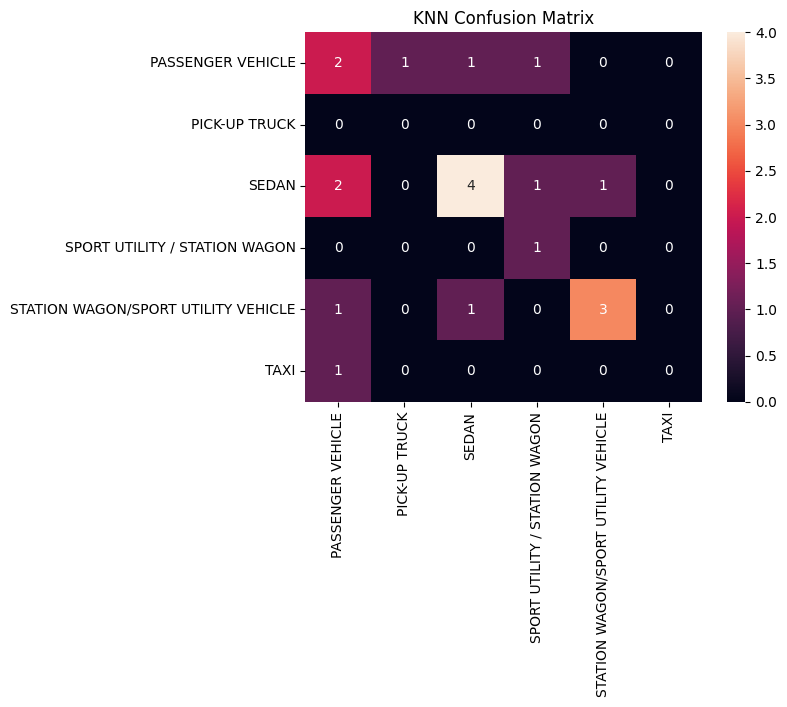

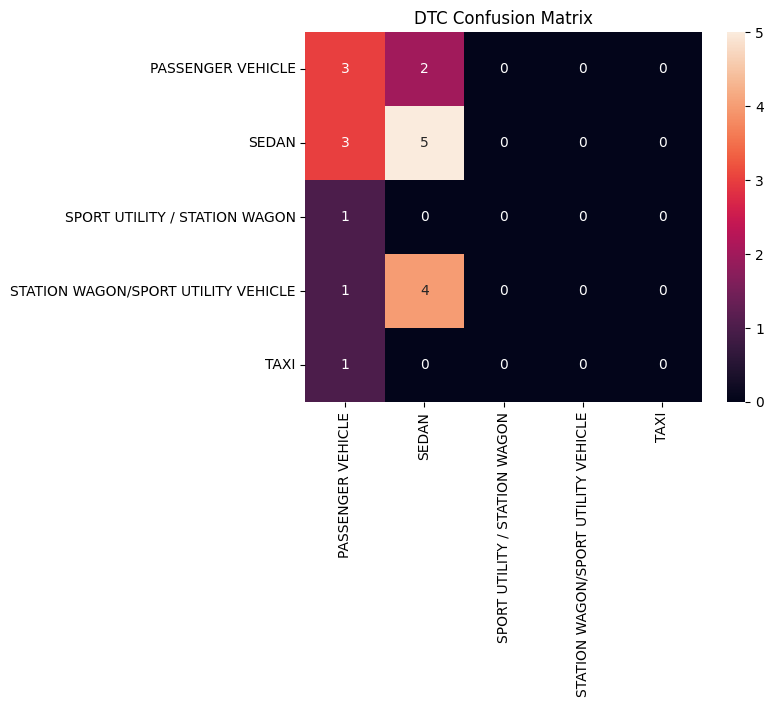

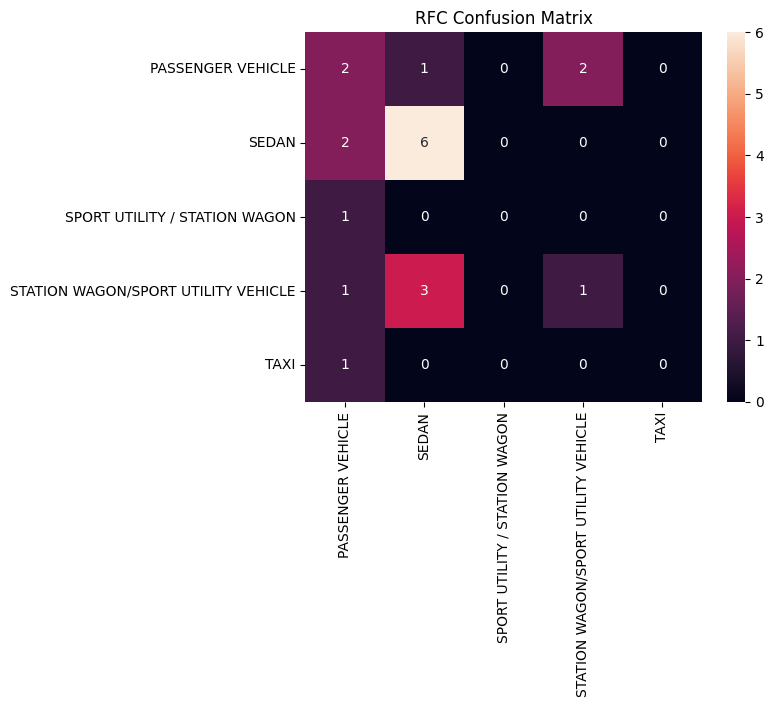

In [222]:
from sklearn.metrics import confusion_matrix, classification_report

kcm = confusion_matrix(y_test, k_y_pred)
dcm = confusion_matrix(y_test, d_y_pred)
rfc = confusion_matrix(y_test, r_y_pred)

kreport = classification_report(y_test, k_y_pred, output_dict=True)
dreport = classification_report(y_test, d_y_pred, output_dict=True)
rreport = classification_report(y_test, r_y_pred, output_dict=True)

kenlabels = [int(label) for label in list(kreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(kenlabels)

sns.heatmap(kcm, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('KNN Confusion Matrix')
plt.show()

denlabels = [int(label) for label in list(dreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(denlabels)

sns.heatmap(dcm, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('DTC Confusion Matrix')
plt.show()

renlabels = [int(label) for label in list(rreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(renlabels)

sns.heatmap(rfc, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('RFC Confusion Matrix')
plt.show()

## References

- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
- https://www.linkedin.com/pulse/title-label-encoding-one-hot-data-preprocessing-shivani-singh
- https://www.linkedin.com/pulse/top-6-machine-learning-algorithms-classification-jagrat-patel/